In [1]:
import os
import glob
import pandas as pd
import numpy as np

# datasetsフォルダ内にあるcsvファイルの一覧を取得
files1 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets4/inside/muscle*.txt")
files2 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets4/outside/muscle*.txt")
files3 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets4/fist/muscle*.txt")

/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
f1_np =[]
fa1 = []
for i in range(150):
    f1 = open(files1[i])
    f1_array = f1.read().split()
    f1_np = np.append(f1_np, f1_array)
    for j in range(1000):
        a1 = f1_np[j].split(",")
        fa1 = np.append(fa1, a1)
fr1 = []
for i in range(fa1.shape[0]):
    fr1 = np.append(fr1,float(fa1[i]))
inside = fr1.reshape(150,1000,2)

In [4]:
f2_np =[]
fa2 = []
for i in range(150):
    f2 = open(files2[i])
    f2_array = f2.read().split()
    f2_np = np.append(f2_np, f2_array)
    for j in range(1000):
        a2 = f2_np[j].split(",")
        fa2 = np.append(fa2, a2)
fr2 = []
for i in range(fa2.shape[0]):
    fr2 = np.append(fr2,float(fa2[i]))
outside = fr2.reshape(150,1000,2)

In [5]:
f3_np =[]
fa3 = []
for i in range(150):
    f3 = open(files3[i-1])
    f3_array = f3.read().split()
    f3_np = np.append(f3_np, f3_array)
    for j in range(1000):
        a3 = f3_np[j-1].split(",")
        fa3 = np.append(fa3, a3)
fr3 = []
fa3 = np.array(fa3)
fr3 = np.array(fr3)
for k in range(fa3.shape[0]):
    fr3 = np.append(fr3,float(fa3[k]))
fist = fr3.reshape(150,1000,2)

In [6]:
x_train = []
for i in range(0,105):
    x_train = np.append(x_train, inside[i])
    x_train = np.append(x_train, outside[i])
    x_train = np.append(x_train, fist[i])
x_test = []
for j in range(105,150):
    x_test = np.append(x_test, inside[j])
    x_test = np.append(x_test, outside[j])
    x_test = np.append(x_test, fist[j])

In [19]:
x_train = x_train.reshape(315,1000,2)
x_test = x_test.reshape(135,1000,2)
y_train = np.array([0,1,2]*105)
y_test = np.array([0,1,2]*45)

In [8]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [9]:
X_train = np.zeros((315,1000))
for i in range(315):
    for j in range(1000):
        X_train_pre = x_train[i][j][1]
        X_train[i][j] = X_train_pre

X_test = np.zeros((135,1000))
for i in range(135):
    for j in range(1000):
        X_test_pre = x_test[i][j][1]
        X_test[i][j] = X_test_pre

In [10]:
def wave_plot_fft(f):
    N =  1000
    dt = 0.01
    freq = np.linspace(0, 1.0/dt, N)
    yf = f/(N/2)
    
    plt.figure(2)
    plt.plot(freq, np.abs(yf))
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.tight_layout()
    plt.show()

In [24]:
x_train_pre = []
for i in range(315):
    x_train_pre = np.append(x_train_pre,fft(X_train[i]))

X_train_fft = x_train_pre.reshape(315,1000)
x_test_pre = []
for i in range(135):
    x_test_pre = np.append(x_test_pre,fft(X_test[i]))

X_test_fft = x_test_pre.reshape(135,1000)

In [12]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import BatchNormalization, Add
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import MaxPool1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/m

In [13]:
batch_size = 64
num_classes = 3
epochs = 50

In [25]:
X_train_tf = np.reshape(X_train_fft, (X_train_fft.shape[0], -1, 1))
X_test_tf = np.reshape(X_test_fft, (X_test_fft.shape[0], -1, 1))

In [20]:
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [21]:
model = Sequential()

model.add(Conv1D(filters=128, input_shape=(X_train_fft.shape[1],1), kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop()
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [22]:
es = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

In [26]:
history_fft = model.fit(X_train_tf, y_train_tf,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose =1,
                       validation_data = (X_test_tf, y_test_tf),
                       callbacks = [es])

W1017 15:43:33.123351 4649948608 deprecation.py:323] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 315 samples, validate on 135 samples
Epoch 1/50


/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


315/315 [==============================] - 3s 10ms/step - loss: 5.9861 - acc: 0.4571 - val_loss: 3.8099 - val_acc: 0.6667
Epoch 2/50
315/315 [==============================] - 2s 6ms/step - loss: 1.7227 - acc: 0.8254 - val_loss: 3.8742e-05 - val_acc: 1.0000
Epoch 3/50
315/315 [==============================] - 2s 6ms/step - loss: 0.0103 - acc: 0.9968 - val_loss: 4.4717e-06 - val_acc: 1.0000
Epoch 4/50
315/315 [==============================] - 2s 6ms/step - loss: 2.5465e-04 - acc: 1.0000 - val_loss: 2.9683e-06 - val_acc: 1.0000
Epoch 5/50
315/315 [==============================] - 2s 6ms/step - loss: 1.8737e-04 - acc: 1.0000 - val_loss: 1.4314e-06 - val_acc: 1.0000
Epoch 6/50
315/315 [==============================] - 2s 6ms/step - loss: 3.1997e-04 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 7/50
315/315 [==============================] - 2s 6ms/step - loss: 2.9789e-04 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 8/50
315/315 [==========================

In [27]:
score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.986821767256212e-07
Test accuracy: 1.0


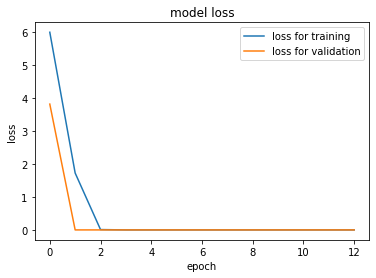

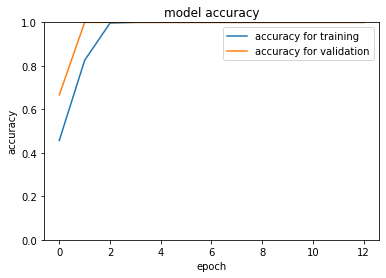

In [28]:
def plot_history_lost(history):
    plt.plot(history.history['loss'], label='loss for training')
    plt.plot(history.history['val_loss'], label='loss for validation')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()
    
def plot_history_acc(history):
    plt.plot(history.history['acc'], label='accuracy for training')
    plt.plot(history.history['val_acc'], label='accuracy for validation')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0,1])
    plt.show()
    
plot_history_lost(history_fft)
plot_history_acc(history_fft)

In [29]:
model.save('myoelectricity4.h5')